In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import pickle

In [7]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='PLVGfPU3tPjL6XqI40XUvSkXqR1VZIKa8-9i6zOQjKkn',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'poweroutput-donotdelete-pr-fbo0xag2eymgks'
object_key = 'Folds5x2_pp.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data= pd.read_csv(body)
data.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [8]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [9]:
data.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [11]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [12]:
data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

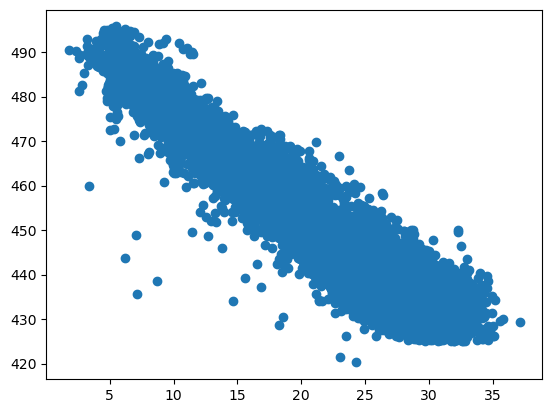

In [13]:
plt.scatter(data['AT'],data['PE'])

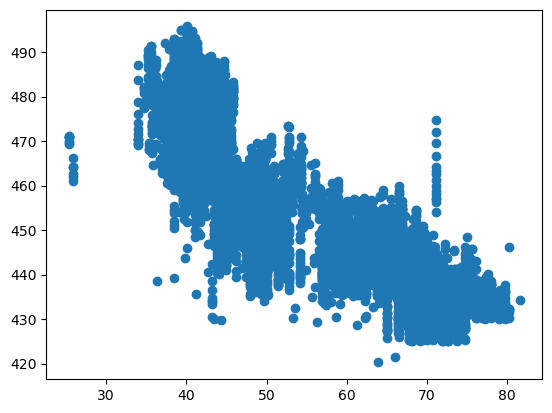

In [14]:
plt.scatter(data['V'],data['PE'])

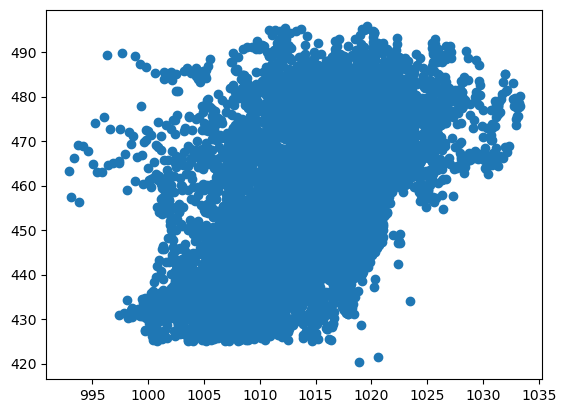

In [15]:
plt.scatter(data['AP'],data['PE'])

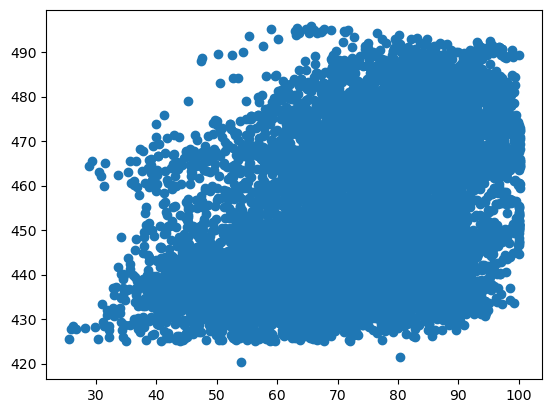

In [16]:
plt.scatter(data['RH'],data['PE'])

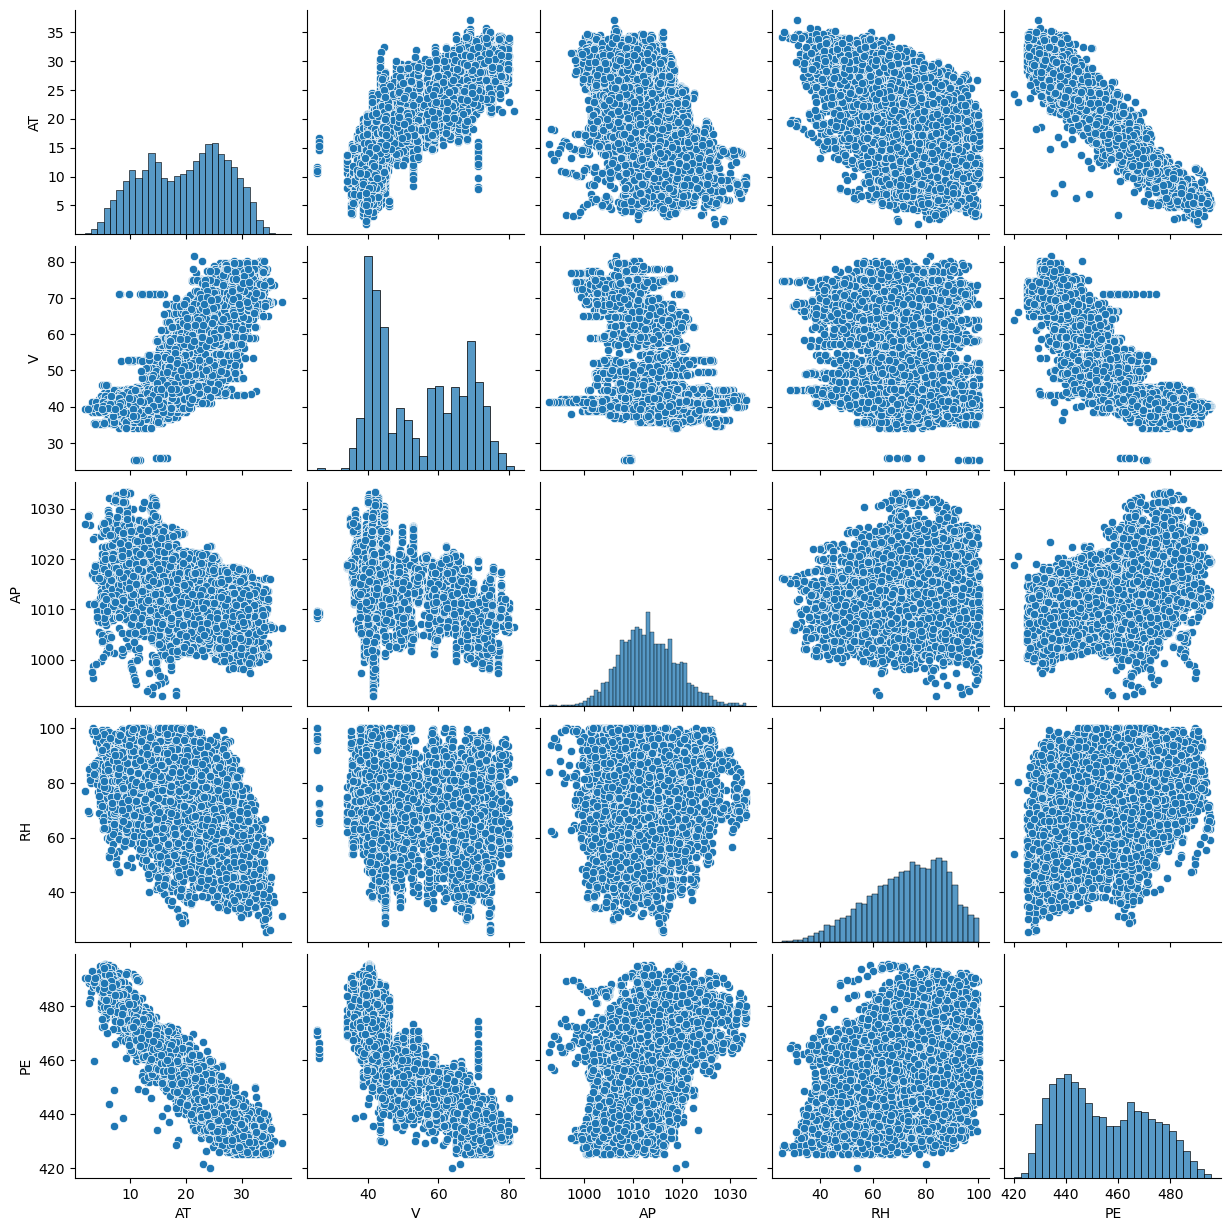

In [17]:
sns.pairplot(data,diag_kind = 'hist')

In [18]:
x=data.drop(['PE'],axis=1)
y=data['PE']

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [20]:
xtrain.shape

(7654, 4)

In [56]:
xtest.iloc[0]

AT      28.66
V       77.95
AP    1009.56
RH      69.07
Name: 4834, dtype: float64

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
LRmodel=LinearRegression()
DTmodel=DecisionTreeRegressor()
RFmodel=RandomForestRegressor()

In [25]:
from sklearn.linear_model import LinearRegression
LRmodel = LinearRegression()

In [26]:
LRmodel.fit(xtrain, ytrain)

LinearRegression()

In [27]:
LinearRegression()

LinearRegression()

In [28]:
LRpred=LRmodel.predict(xtest)
from sklearn.metrics import r2_score
LRscore=r2_score(ytest,LRpred)
LRscore

0.9325315554761302

In [29]:
from sklearn.metrics import r2_score
LRscore=r2_score(ytest, LRpred)
LRscore

0.9325315554761302

In [30]:
from sklearn.tree import DecisionTreeRegressor
DTRmodel=DecisionTreeRegressor()
DTRmodel.fit(xtrain, ytrain)
DecisionTreeRegressor()
DTRpred=DTRmodel.predict(xtest)
DTRscore=r2_score(ytest, DTRpred)
DTRscore

0.9233170568686935

In [31]:
DTRscore=r2_score(ytest, DTRpred)
DTRscore

0.9233170568686935

In [32]:
from sklearn.ensemble import RandomForestRegressor
RFmodel=RandomForestRegressor()
RFmodel.fit(xtrain, ytrain)
RandomForestRegressor()
RFpred=RFmodel.predict(xtest)
RFscore=r2_score(ytest, RFpred)
RFscore

0.9651464968880099

In [33]:
RFscore=r2_score(ytest, RFpred)
RFscore

0.9651464968880099

In [34]:
from sklearn.metrics import r2_score
LRscore=r2_score(ytest, LRpred)
LRscore

0.9325315554761302

In [35]:
DTRscore=r2_score(ytest, DTRpred)
DTRscore

0.9233170568686935

In [36]:
RFscore=r2_score(ytest, RFpred)
RFscore

0.9651464968880099

In [37]:
!pip install ibm_watson_machine_learning

In [41]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "slh8-ruOG1-dzPa_sS9bv9xOmneEQRwlIDm_touyMEDj"
}
client = APIClient(wml_credentials)

In [42]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [43]:
space_uid = guid_from_space_name(client, space_name='models')
print("Space UID = " + space_uid)

Space UID = 89bf92a2-56d2-4e4c-9278-1e146b9013a6


In [44]:
client.set.default_space(space_uid)

'SUCCESS'

In [45]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [46]:
software_spec_uid= client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [53]:
model_details = client.repository.store_model(model=RFmodel,meta_props={
client.repository.ModelMetaNames.NAME:"churn_modeling",
client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                             )
model_id=client.repository.get_model_id(model_details)

In [54]:
ypred=RFmodel.predict(xtest)
print(ypred)

[433.8574 457.5451 463.5921 ... 468.9306 439.4608 461.2873]


In [55]:
RFmodel.score(xtrain,ytrain)

0.9945276291452032